# Memology - DataScience & Memes
![](http://orig07.deviantart.net/3e62/f/2015/267/4/1/meme_team_logo_png_smol_by_kuiwi-d9ass0h.png)

In [1]:
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=8, 8
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Часть 1. Описание набора данных и признаков

In [3]:
memes = pd.read_csv('datasets/MEMES_new_short.csv', index_col=0)

In [4]:
memes.shape

(4206, 14)

In [5]:
memes.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [6]:
memes.reset_index(drop=True, inplace=True)

In [7]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4206 non-null   object
 1   status        4206 non-null   object
 2   type          1786 non-null   object
 3   origin_year   4206 non-null   object
 4   origin_place  4205 non-null   object
 5   date_added    4206 non-null   object
 6   views         4206 non-null   int64 
 7   videos        4206 non-null   int64 
 8   photos        4206 non-null   int64 
 9   comments      4206 non-null   int64 
 10  tags          4205 non-null   object
 11  about         3798 non-null   object
 12  origin        2524 non-null   object
 13  other_text    3508 non-null   object
dtypes: int64(4), object(10)
memory usage: 460.2+ KB


Итак, пройдемся по переменным:

- name - название мема
- added - дата добавления
- views - число просмотров на сайте
- comments - число комментариев
- status - категориальная переменная, статус присваивается на сайте в зависимости от "одобрения" мема сообществом
- year - год, к которому относится первоисточник появления картинки (например, год выхода определенной серии Симпсонов)
- tags - тэги, также являются категориями
- about - описание мема
- origin - описание происхождения
- spread - где приобрел особенную популярность

In [8]:
memes.head(3)

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."


In [9]:
memes.tail(3)

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
4203,Because of Parkinson's,Confirmed,NaN,2006,YTMND,2013-09-26T16:26:49-04:00,205323,2,101,61,"michael j. fox, joke, image macro, 4chan, cele...","Because of Parkinson's (also known as ""Michael...",Michel J. Fox is an Canadian–American actor an...,The first instance of Michael J. Fox's equatio...
4204,Paranoid Parrot,Confirmed,Image Macro,2009,r9k,2019-10-31T03:47:02-04:00,416158,2,218,51,"4chan, parrot, paranoia, paranoid parrot, advi...",Paranoid Parrot is an advice animal image macr...,"While the photographer is unknown, the origina...","In 2007, the same image was used to illustrate..."
4205,I Believe You Have My Stapler,Confirmed,Pop Culture Reference,2004,YTMND,2018-04-09T16:28:49-04:00,109512,1,25,29,"movie, catchphrase, film, office space, movie ...",NaN,Office Space was a 1999 comedy by Beavis and B...,Milton Waddams (played by actor Stephen Root) ...


### Часть 2. первичный анализ признаков

Конечно же в первую очередь хочется посмотреть на самый популярный мем

In [10]:
memes[memes.views==memes.views.max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
3958,Me Gusta,Confirmed,Character,2010,4chan,2018-09-27T16:03:51-04:00,9095857,21,518,142,"4chan, rageguy, spinoff, 4 panel comic, me gus...",Me Gusta is a rage comic face that is typicall...,"The colloquial Spanish phrase ""Me Gusta"" was f...","Spread In December 2010, the single topic blog..."


### Время добавления
Так как в нашем распоряжении есть переменная added, то можно поиграться с ней, преобразовав в понятный питону формат
и получить час, день, месяц, год добавления

In [11]:
memes['Timestamp'] = pd.to_datetime(memes['date_added'])

In [12]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4206 non-null   object
 1   status        4206 non-null   object
 2   type          1786 non-null   object
 3   origin_year   4206 non-null   object
 4   origin_place  4205 non-null   object
 5   date_added    4206 non-null   object
 6   views         4206 non-null   int64 
 7   videos        4206 non-null   int64 
 8   photos        4206 non-null   int64 
 9   comments      4206 non-null   int64 
 10  tags          4205 non-null   object
 11  about         3798 non-null   object
 12  origin        2524 non-null   object
 13  other_text    3508 non-null   object
 14  Timestamp     4206 non-null   object
 15  Year          4206 non-null   int64 
 16  Month         4206 non-null   int64 
 17  Day           4206 non-null   int64 
 18  Hour          4206 non-null   int64 
 19  Weekda

Так же пригодится переменная, отвечающая за число дней, прошедших с момента досбавления на сайт

In [13]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp) / np.timedelta64(1, 'D')

In [14]:
memes.date_added[0]

'2019-10-24T04:05:03-04:00'

In [15]:
pd.to_datetime(memes.date_added[0]).weekday()

3

А теперь, для наших созданных переменных построим несколько гистограмм

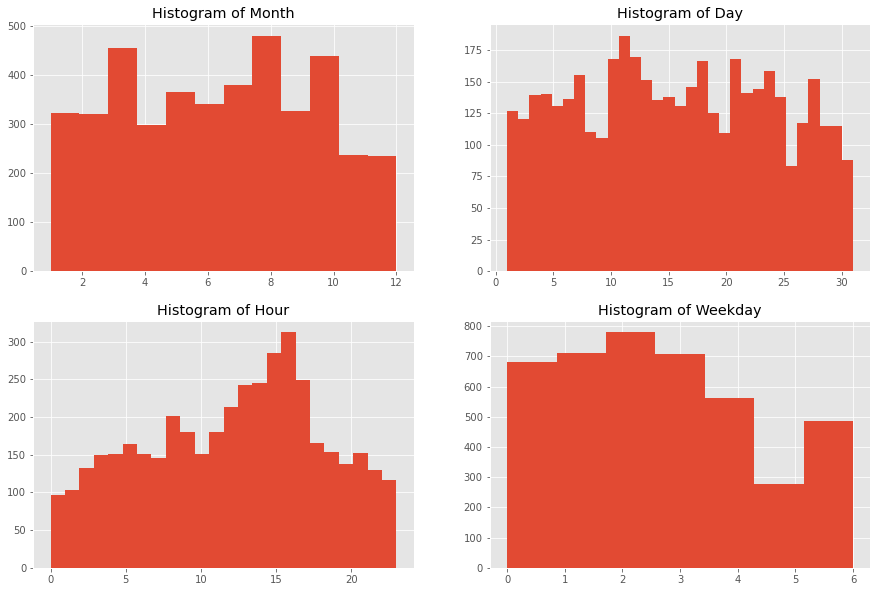

In [16]:
f, axarr = plt.subplots(2, 2, figsize=(15, 10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins=bins[index])
        axarr[i, j].set_title(f'Histogram of {times[index]}')

        index += 1

f.subplots_adjust(hspace=0.2)

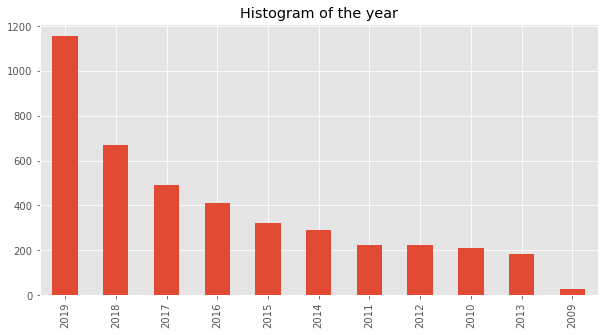

In [17]:
memes.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Histogram of the year')
plt.show()

In [18]:
memes.Year.value_counts(normalize=True).apply(lambda x: f'{x*100:.2f}')

2019    27.41
2018    15.93
2017    11.70
2016     9.77
2015     7.66
2014     6.92
2011     5.37
2012     5.33
2010     4.97
2013     4.33
2009     0.62
Name: Year, dtype: object

In [19]:
pd.set_option('mode.chained_assignment','warn')
memes.tags[memes.tags.isin(['none...', 'none', 'Unknown', 'none... Unknown', 'None'])] = 'unknown'

<ipython-input-19-ef6432d72ec0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memes.tags[memes.tags.isin(['none...', 'none', 'Unknown', 'none... Unknown', 'None'])] = 'unknown'


In [20]:
memes.origin_year.describe()

count        4206
unique        117
top       Unknown
freq          349
Name: origin_year, dtype: object

In [21]:
memes.origin_year[memes.origin_year=='Unknown'] = None

<ipython-input-21-6a39d0d8ae4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memes.origin_year[memes.origin_year=='Unknown'] = None


In [22]:
memes.origin_year.fillna(0, inplace=True)

In [23]:
memes.origin_year[~memes.origin_year.apply(lambda x: str(x).isdigit())] = 0

<ipython-input-23-251f79d4276b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memes.origin_year[~memes.origin_year.apply(lambda x: str(x).isdigit())] = 0


In [24]:
memes.origin_year.apply(lambda x: str(x).isdigit())

0       True
1       True
2       True
3       True
4       True
        ... 
4201    True
4202    True
4203    True
4204    True
4205    True
Name: origin_year, Length: 4206, dtype: bool

In [25]:
# memes.origin_year[(memes.origin_year>2000)&(memes.origin_year<=2020)].hist(bins=200)
# plt.show()

### Число просмотров

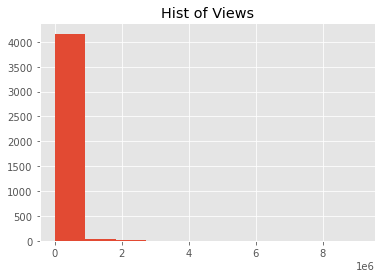

In [26]:
memes.views[memes.views>0].hist(bins=10)
plt.title('Hist of Views')
plt.show()

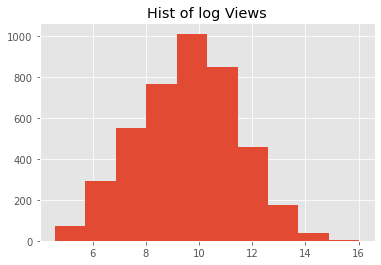

In [27]:
memes.views[memes.views>0].apply(np.log).hist(bins=10)
plt.title('Hist of log Views')
plt.show()

### Популярность

Метрикой оценки популярности, в данном случае будет оценка среднего числа просмотров в день. Для этого разделим
фактическое число просмотров на число дней, прошедших со дня публикации.

In [28]:
memes['average_views'] = memes.views/memes.days_from_creation

In [29]:
memes[memes['average_views'] == memes['average_views'].max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,...,origin,other_text,Timestamp,Year,Month,Day,Hour,Weekday,days_from_creation,average_views
831,Flex Tape,Submission,Advertisement,2017,Flex Seal,2019-11-06T14:33:40-05:00,92958,27,77,22,...,"On January 12th, 2017, Flex Seal uploaded a co...","Spread On September 30th, 2017, popular YouTub...",2019-11-06 14:33:40-05:00,2019,11,6,14,2,0.0,inf


In [30]:
index = memes['average_views'] == memes['average_views'].max()
memes['average_views'][index] = memes['views'][index]

<ipython-input-30-33d403789fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memes['average_views'][index] = memes['views'][index]


Text(0.5, 1.0, 'Hist of log average views')

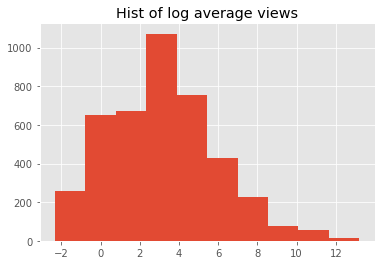

In [31]:
plt.hist(memes.average_views.apply(np.log))
plt.title('Hist of log average views')

### Посмотрим на самые популярные

In [32]:
popular = memes.sort_values(by='average_views', ascending=False)
for i in popular.index.tolist()[:7]:
    print(f'Meme name: {popular.loc[i, "name"]}')
    print(f'Average views (per day) {round(popular.loc[i, "average_views"])}')
    print('================\n')

Meme name: Colonel Meow
Average views (per day) 536753

Meme name: Distracted Boyfriend
Average views (per day) 466923

Meme name: Derp
Average views (per day) 300836

Meme name: Need for Speed
Average views (per day) 246737

Meme name: Shitposting
Average views (per day) 210984

Meme name: Starter Packs
Average views (per day) 167624

Meme name: Double D's Facts Book
Average views (per day) 166858



### Комментарии


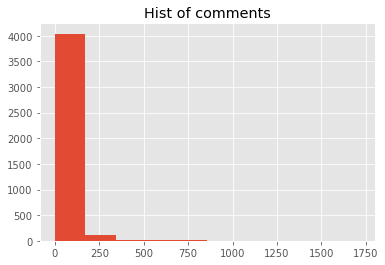

In [33]:
memes.comments.hist()
plt.title('Hist of comments')
plt.show()

### Посмотрим на самые комментируемы

In [34]:
memes['average_comments'] = memes.comments/memes.days_from_creation

In [35]:
index = memes['average_comments']==memes['average_comments'].max()
memes['average_comments'][index] = memes['comments'][index]

<ipython-input-35-f5a439e103ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memes['average_comments'][index] = memes['comments'][index]


In [36]:
popular = memes.sort_values(by='average_comments', ascending=False)
for i in popular.index.tolist()[:7]:
    print(f'Meme name: {popular.loc[i, "name"]}')
    print(f'Average comments (per day) {round(popular.loc[i, "average_comments"])}')
    print('================\n')

Meme name: Need for Speed
Average comments (per day) 989

Meme name: Hero Cat
Average comments (per day) 308

Meme name: Colonel Meow
Average comments (per day) 302

Meme name: Miley Cyrus
Average comments (per day) 99

Meme name: McDonald’s "Happy" Mascot
Average comments (per day) 97

Meme name: Metro Man Sees Megamind and Roxie
Average comments (per day) 87

Meme name: Double D's Facts Book
Average comments (per day) 83



### Статус

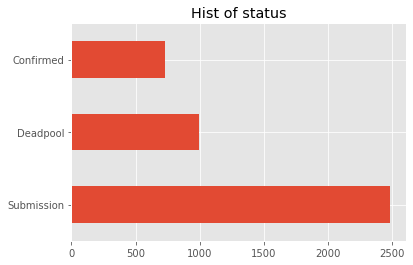

In [37]:
memes.status.value_counts().plot(kind='barh')
plt.title('Hist of status')
plt.show()

А вот здесь можно попутно решать задачу множественной классификации - для каждого мема есть 3 состояния

- Submission - добавлен недавно или ещё не стал "признанным в обществе"
- Deadpool - если умер и не используется
- Confirmed - активно используется и получил статус "подтверждённого" мема

### ML

In [38]:
import nltk
from nltk.corpus import stopwords

In [39]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [40]:
memes['description'] = memes.tags.fillna('')+' '+\
                       memes.about.fillna('')+' '+\
                       memes.origin.fillna('')+' '+\
                       memes.other_text.fillna('')

In [41]:
memes.description = memes.description.apply(lambda x: x.lower().replace('unknown', ''))

In [42]:
memes.description[0]

'jay-lee hilzinger & maddie flynn, eshayz, david jones, freakout, jay-lee hilzinger, maddie flynn, frazzle tazz, caiden butler, declan, zinger burgers, simbra, sir david attenborough, daniel sanders muvvafukka refers to a viral video of two teenage girls, jay-lee hilzinger and maddie flynn, having a tantrum in australian department store david jones. quotes from the video, as well as a face hilzinger made in the video, have been parodied in memes in australian areas of the internet. while it appears the original video is deleted, it appears to have been first posted to facebook on october 20th, 2019. the person holding the camera says its "a sunday," indicating the likely date the tantrum was filmed was sunday, october 20th. a screen-capture of the video when it was live on facebook was posted to youtube by user frazzle tazz on the 21st.[1] the screen capture is taken from a video posted by facebook user caiden butler. butler has also posted the video to youtube (shown below). butler a

In [43]:
data_stemmer(memes.description[0])

'jay-le hilzing & maddi flynn, eshayz, david jones, freakout, jay-le hilzinger, maddi flynn, frazzl tazz, caiden butler, declan, zinger burgers, simbra, sir david attenborough, daniel sander muvvafukka refer viral video two teenag girls, jay-le hilzing maddi flynn, tantrum australian depart store david jones. quot video, well face hilzing made video, parodi meme australian area internet. appear origin video deleted, appear first post facebook octob 20th, 2019. person hold camera say "a sunday," indic like date tantrum film sunday, octob 20th. screen-captur video live facebook post youtub user frazzl tazz 21st.[1] screen captur taken video post facebook user caiden butler. butler also post video youtub (shown below). butler also made screenshot hilzing face video cover photo 20th.[2] face (shown below), would use futur photoshop memes.     spread video grew popular facebook youtube, australian internet user began joke various memes. youtub simbra edit clip two girl commerci zinger burge

In [44]:
memes.description = memes.description.apply(lambda x: data_stemmer(x))

In [45]:
X = memes.description
y = memes.average_views

Для TF-IDF попробуем использовать биграммы, а чтобы словарь не раздувался до неадекватных размеров, ограничим 
минимальную частоту содержания слов в документе 0.1%. Т.е. будем выкидывать такие слова и биграммы, 
которые встречаются реже, чем в 0.1% длокументов.

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm='l2')

In [47]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=.3, random_state=42)

In [48]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

((2944, 38513), (1262, 38513))

In [49]:
Xtr_tfidf

<2944x38513 sparse matrix of type '<class 'numpy.float64'>'
	with 664372 stored elements in Compressed Sparse Row format>

Целевую переменную (среднее сичло просмотров в день), разделим на 5 групп по квантилям, одновременно получая наивный baseline - если мы по всем объектам примем один класс,то итоговая точность составит 1/5 = 20%. еще один подход плюс
подхода - дисбаланса классов у нас точно не будет.

In [50]:
ytr_quantile = pd.qcut(ytr, q=3)

In [51]:
ytr_quantile.value_counts()

(0.096, 7.114]          982
(7.114, 58.965]         981
(58.965, 536753.118]    981
Name: average_views, dtype: int64

Для будущих нужд запомним имеющиеся интервалы

In [52]:
intervals = ytr_quantile.unique().categories.values
intervals

<IntervalArray>
[(0.096, 7.114], (7.114, 58.965], (58.965, 536753.118]]
Length: 3, closed: right, dtype: interval[float64]

Так как на текстовой выборке мы аналогичное преобразование с квантилем выполнять не можем (группы не будут совпадать)
запишем функцию для преобразования тестовых значений

In [53]:
def quantile(y):
    for interval in intervals:
        if y <= interval.right:
            return interval
            break
    return interval

In [54]:
yval_quantile = yval.apply(quantile)

In [55]:
yval_quantile.value_counts()

(58.965, 536753.118]    436
(7.114, 58.965]         426
(0.096, 7.114]          400
Name: average_views, dtype: int64

Наконец для обучения зщакодируем интервалы при помощи LabelEncoder()

In [56]:
ytr_quantile = le.fit_transform(ytr_quantile)
yval_quantile = le.transform(yval_quantile)

In [57]:
ytr_quantile

array([0, 1, 0, ..., 1, 0, 1])

In [58]:
le.inverse_transform(ytr_quantile)

array([Interval(0.096, 7.114, closed='right'),
       Interval(7.114, 58.965, closed='right'),
       Interval(0.096, 7.114, closed='right'), ...,
       Interval(7.114, 58.965, closed='right'),
       Interval(0.096, 7.114, closed='right'),
       Interval(7.114, 58.965, closed='right')], dtype=object)

In [59]:
Xtr_tfidf.shape, Xval_tfidf.shape

((2944, 38513), (1262, 38513))

In [60]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

In [61]:
logit_sgd = SGDClassifier(
    loss='log',
    shuffle=True,
    n_iter_no_change=10,
    max_iter=1000,
    penalty='l1',
    random_state=42
)

In [62]:
logit_sgd.fit(Xtr_tfidf, ytr_quantile)
print(accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr_quantile))
print(accuracy_score(logit_sgd.predict(Xval_tfidf), yval_quantile))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval_quantile))

0.8474864130434783
0.6109350237717908
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       451
           1       0.43      0.51      0.47       363
           2       0.60      0.58      0.59       448

    accuracy                           0.61      1262
   macro avg       0.62      0.60      0.61      1262
weighted avg       0.63      0.61      0.62      1262



In [63]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1)
logit_cv.fit(Xtr_tfidf, ytr_quantile)

LogisticRegressionCV(n_jobs=-1)

In [64]:
print(accuracy_score(logit_cv.predict(Xtr_tfidf), ytr_quantile))
print(accuracy_score(logit_cv.predict(Xval_tfidf), yval_quantile))

print(classification_report(logit_cv.predict(Xval_tfidf), yval_quantile))

0.9847146739130435
0.6275752773375595
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       439
           1       0.45      0.50      0.48       383
           2       0.61      0.61      0.61       440

    accuracy                           0.63      1262
   macro avg       0.63      0.62      0.63      1262
weighted avg       0.64      0.63      0.63      1262



In [65]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=25):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ['lightblue' for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features),
               feature_names[interesting_coefficients], rotation=60, ha='right', fontsize=14);
    plt.title(title)

In [66]:
logit_sgd.coef_.shape

(3, 38513)

На графиках отображены top 25 слов, которые (по мнению логистической регрессии), наиболее сильно увеличивают 
вроятность попадания в соответствующий класс популярности

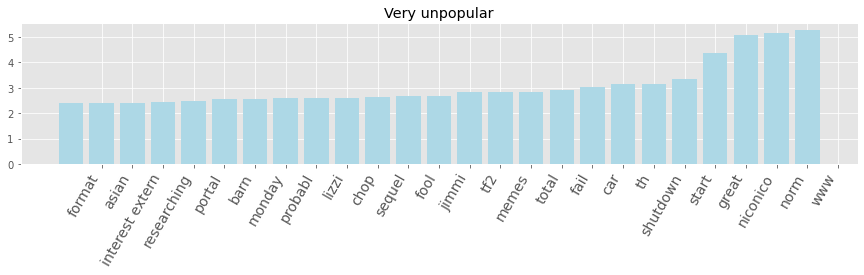

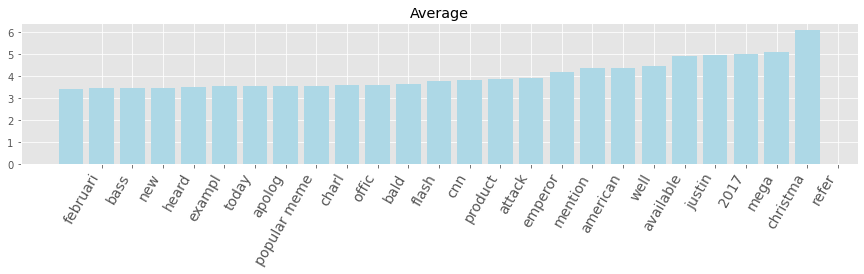

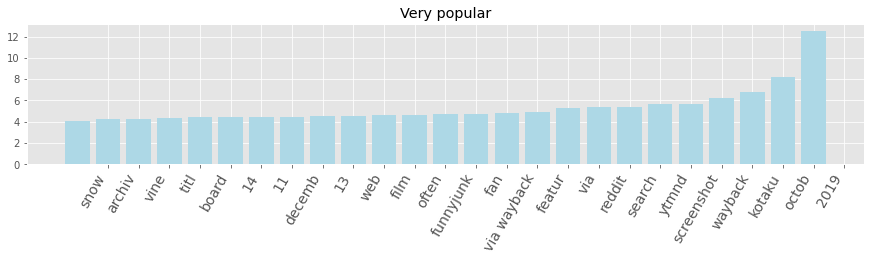

In [67]:
titles = ["Very unpopular", 'Average', 'Very popular'] # "Unpopular",'Popular', 
for i in range(3):
    visualize_coefficients(logit_sgd.coef_[i,:], tf_vectorizer.get_feature_names(),
                      title=titles[i], plot_num=i)

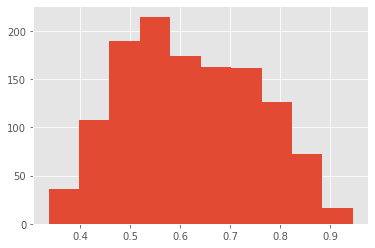

In [68]:
plt.hist(np.max(logit_sgd.predict_proba(Xval_tfidf), axis=1));

In [69]:
logit_sgd.predict_proba(Xval_tfidf)

array([[0.00306058, 0.48962858, 0.50731084],
       [0.47211532, 0.27780688, 0.2500778 ],
       [0.71323172, 0.18345106, 0.10331722],
       ...,
       [0.57889472, 0.29564875, 0.12545653],
       [0.34525323, 0.41686866, 0.2378781 ],
       [0.37461185, 0.38739071, 0.23799745]])

In [70]:
predictions = logit_sgd.predict(Xval_tfidf)
certainty_mask = np.max(logit_sgd.predict_proba(Xval_tfidf), axis=1)>.6

In [71]:
meme_slice = memes.loc[Xval.index[certainty_mask]]
meme_slice['actual_popularity'] = le.inverse_transform(predictions[certainty_mask]) 

In [72]:
meme_slice[
    ['name', 'origin_year', 'date_added', 'views', 'description', 'average_views', 'actual_popularity'] # 
    
].sort_values(by='views', ascending=False)

,name,origin_year,date_added,views,description,average_views,actual_popularity
1377,TheLegend27,2016,2019-10-07T05:37:23-04:00,1284582,"video, ad, game war, viral, flater, grandayy, ...",42236.416865,"(58.965, 536753.118]"
3360,Zyzz,2010,2019-08-21T10:45:21-04:00,917088,"bodybuilding, fitness, aesthetics, zyzz, good ...",11879.344400,"(58.965, 536753.118]"
1659,Yes - Roundabout / To Be Continued,2016,2019-07-10T16:40:07-04:00,910219,"jjba, jojo bizzar adventure, exploitable, vine...",7651.866401,"(58.965, 536753.118]"
3790,He-Man Sings / HEYYEYAAEYAAAEYAEYAA,2005,2019-01-30T09:08:57-05:00,883569,"roll, rick roll, he-man, superhero, heman, hey...",3153.064255,"(58.965, 536753.118]"
1491,Stefán Karl Stefánsson / Robbie Rotten,2016,2019-07-10T11:28:40-04:00,693765,"robbi rotten, lazi town, irl, stefán karl stef...",5821.634568,"(58.965, 536753.118]"
...,...,...,...,...,...,...,...
1477,#Tierry,2016,2016-10-18T14:17:54-04:00,165,"badass, cool, hip, swag, yolo, tierri tierry. ...",0.148108,"(0.096, 7.114]"
949,Paul Zante,2015,2017-08-29T18:45:04-04:00,158,donald love billi jone admir paul david zant ...,0.197780,"(0.096, 7.114]"
1022,Bob gets jolted,0,2018-08-24T22:22:18-04:00,157,"funny, electric, shocking, sarah, bob novemb 2...",0.357862,"(0.096, 7.114]"
33,"Wesley Ford (Also known as Wesley_Ford, or u/W...",2019,2019-10-20T12:12:23-04:00,146,"troll, reddit, hypixel, minecraft wesley ford ...",8.518196,"(58.965, 536753.118]"


### А теперь можно взглянуть на confision matrix и посмотреть, где же косячат модели

In [73]:
def plot_confusion(predictions, yval, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array, index=[i for i in titles],
                         columns=[i for i in titles])
    plt.figure(figsize=(7,7))
    sns.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.title(title);

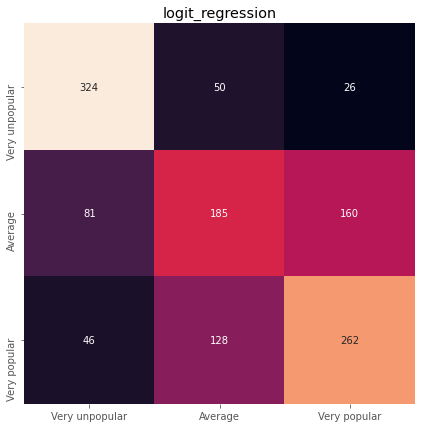

In [74]:
plot_confusion(logit_sgd.predict(Xval_tfidf), yval_quantile, 'logit_regression')

In [75]:
from wordcloud import WordCloud # визуализаирует облако слов